# Influence of 3-Point Shots in the NBA 

For this project, we'll mainly be examining how 3-point shots influence NBA games and the overall win-rate. 

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [5]:
nba_shots = pd.read_csv('NBA3ptShootingData(13-20).csv')
nba_shots.head(4)

,Teams,Year,3PM,3PA,3P%,3P% share in Total Points,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93,NaN,NaN,NaN,NaN,NaN
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30,NaN,NaN,NaN,NaN,NaN
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90,NaN,NaN,NaN,NaN,NaN
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90,NaN,NaN,NaN,NaN,NaN


First we have to perform some level 1 data cleaning.

In [6]:
nba_shots = nba_shots.drop(['Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1)
nba_shots

,Teams,Year,3PM,3PA,3P%,3P% share in Total Points
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50
...,...,...,...,...,...,...
205,New Orleans Pelicans,2015-16,8.6,23.8,36.0,25.10
206,New Orleans Pelicans,2016-17,9.4,26.8,35.0,27.00
207,New Orleans Pelicans,2017-18,10.2,28.2,36.2,27.40
208,New Orleans Pelicans,2018-19,10.3,29.9,34.4,26.80


In [7]:
nba_shots = nba_shots.rename(columns={'Teams': 'Team'})
nba_shots.head(1)

,Team,Year,3PM,3PA,3P%,3P% share in Total Points
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93


In [8]:
nba_wins = pd.read_csv('win percentage.csv')
nba_wins =  nba_wins.drop(nba_wins.index[0])
nba_wins = nba_wins.rename(columns={'TEAMS': 'Team'})

#'2013-14 Win %': 'Win Pct', '2014-15 Win %': 'Win Pct',
#'2015-16 Win %': 'Win Pct', '2016-17 Win %': 'Win Pct',
#'2017-18 Win %': 'Win Pct', '2018-19 Win %': 'Win Pct',
#'2019-20 Win %': 'Win Pct',})

nba_wins = nba_wins.sort_values(by=['Team'])
nba_teams_dict = {'Atlanta': 'Atlanta Hawks',
    'Boston': 'Boston Celtics',
    'Brooklyn': 'Brooklyn Nets',
    'Charlotte': 'Charlotte Hornets',
    'Chicago': 'Chicago Bulls',
    'Cleveland': 'Cleveland Cavaliers',
    'Dallas': 'Dallas Mavericks',
    'Denver': 'Denver Nuggets',
    'Detroit': 'Detroit Pistons',
    'Golden State': 'Golden State Warriors',
    'Houston': 'Houston Rockets',
    'Indiana': 'Indiana Pacers',
    'LA': 'Los Angeles Clippers',
    'LA Lakers': 'Los Angeles Lakers',
    'Memphis': 'Memphis Grizzlies',
    'Miami': 'Miami Heat',
    'Milwaukee': 'Milwaukee Bucks',
    'Minnesota': 'Minnesota Timberwolves',
    'New Orleans': 'New Orleans Pelicans',
    'New York': 'New York Knicks',
    'Oklahoma City': 'Oklahoma City Thunder',
    'Orlando': 'Orlando Magic',
    'Philadelphia': 'Philadelphia 76ers',
    'Phoenix': 'Phoenix Suns',
    'Portland': 'Portland Trail Blazers',
    'Sacramento': 'Sacramento Kings',
    'San Antonio': 'San Antonio Spurs',
    'Toronto': 'Toronto Raptors',
    'Utah': 'Utah Jazz',
    'Washington': 'Washington Wizards'}

nba_wins['Team'] = nba_wins['Team'].replace(nba_teams_dict)
nba_wins

,Team,2014 Win %,2015 Win %,2016 Win %,2017 Win %,2018 Win %,2019 Win %,2020 Win %,2021 Win %,2022 Win %,2023 Win %
20,Atlanta Hawks,.463,.732,.585,.524,.293,.354,.299,.569,.524,.500
27,Boston Celtics,.305,.488,.585,.646,.671,.598,.667,.500,.622,.695
15,Brooklyn Nets,.537,.463,.256,.244,.341,.512,.486,.667,.537,.549
17,Charlotte Hornets,.524,.402,.585,.439,.439,.476,.354,.458,.524,.329
13,Chicago Bulls,.585,.610,.512,.500,.329,.268,.338,.431,.561,.488
24,Cleveland Cavaliers,.402,.646,.695,.622,.610,.232,.292,.306,.537,.622
10,Dallas Mavericks,.598,.610,.512,.402,.293,.402,.573,.583,.634,.463
18,Denver Nuggets,.439,.366,.402,.488,.561,.659,.630,.653,.585,.646
26,Detroit Pistons,.354,.390,.537,.451,.476,.500,.303,.278,.280,.207
6,Golden State Warriors,.622,.817,.890,.817,.707,.695,.231,.542,.646,.537


In [9]:
nba_columns = nba_wins.columns.tolist()
for i, col in enumerate(nba_columns):
    print(f"Column {i}: {col}")

Column 0: Team
Column 1: 2014 Win %
Column 2: 2015 Win %
Column 3: 2016 Win %
Column 4: 2017 Win %
Column 5: 2018 Win %
Column 6: 2019 Win %
Column 7: 2020 Win %
Column 8: 2021 Win %
Column 9: 2022 Win %
Column 10: 2023 Win %


In [10]:
start_col = 1
end_col = 8
selected_values = nba_wins.iloc[:, start_col:end_col].values.flatten().tolist()
print(selected_values)

['.463', '.732', '.585', '.524', '.293', '.354', '.299', '.305', '.488', '.585', '.646', '.671', '.598', '.667', '.537', '.463', '.256', '.244', '.341', '.512', '.486', '.524', '.402', '.585', '.439', '.439', '.476', '.354', '.585', '.610', '.512', '.500', '.329', '.268', '.338', '.402', '.646', '.695', '.622', '.610', '.232', '.292', '.598', '.610', '.512', '.402', '.293', '.402', '.573', '.439', '.366', '.402', '.488', '.561', '.659', '.630', '.354', '.390', '.537', '.451', '.476', '.500', '.303', '.622', '.817', '.890', '.817', '.707', '.695', '.231', '.659', '.683', '.500', '.671', '.793', '.646', '.611', '.683', '.463', '.549', '.512', '.585', '.585', '.616', '.695', '.683', '.646', '.622', '.512', '.585', '.681', '.329', '.256', '.207', '.317', '.427', '.451', '.732', '.610', '.671', '.512', '.524', '.268', '.402', '.466', '.659', '.451', '.585', '.500', '.537', '.476', '.603', '.183', '.500', '.402', '.512', '.537', '.732', '.767', '.488', '.195', '.354', '.378', '.573', '.439',

In [12]:
teams_list = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
              'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
              'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat',
              'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks',
              'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers',
              'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

years_list = ['2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']

# Create a new dataframe with team names appearing 7 times each
nba_df = pd.DataFrame({'Team': np.repeat(teams_list, 7)})
nba_df.insert(loc=1, column='Year', value=np.repeat(years_list, 30)) #7 seasons by 30 = 210 to match column
nba_df['index'] = nba_df.groupby('Team').cumcount()
nba_df['Year'] = nba_df['index'] + int(nba_df['Year'].iloc[0][:4]) 
nba_df['Year'] = nba_df['Year'].astype(str) + '-' + nba_df['Year'].add(1).astype(str).str[2:4] # shift year by 1 and convert to string
nba_df.drop(columns=['index'], inplace=True)
nba_df

,Team,Year
0,Atlanta Hawks,2013-14
1,Atlanta Hawks,2014-15
2,Atlanta Hawks,2015-16
3,Atlanta Hawks,2016-17
4,Atlanta Hawks,2017-18
...,...,...
205,Washington Wizards,2015-16
206,Washington Wizards,2016-17
207,Washington Wizards,2017-18
208,Washington Wizards,2018-19


In [13]:
counts = nba_df['Team'].value_counts()
print(counts)

Team
Atlanta Hawks             7
Boston Celtics            7
Utah Jazz                 7
Toronto Raptors           7
San Antonio Spurs         7
Sacramento Kings          7
Portland Trail Blazers    7
Phoenix Suns              7
Philadelphia 76ers        7
Orlando Magic             7
Oklahoma City Thunder     7
New York Knicks           7
New Orleans Pelicans      7
Minnesota Timberwolves    7
Milwaukee Bucks           7
Miami Heat                7
Memphis Grizzlies         7
Los Angeles Lakers        7
Los Angeles Clippers      7
Indiana Pacers            7
Houston Rockets           7
Golden State Warriors     7
Detroit Pistons           7
Denver Nuggets            7
Dallas Mavericks          7
Cleveland Cavaliers       7
Chicago Bulls             7
Charlotte Hornets         7
Brooklyn Nets             7
Washington Wizards        7
Name: count, dtype: int64


In [200]:

teams_list = ['Atlanta Hawks', 'Boston Celtics', 'Brooklyn Nets', 'Charlotte Hornets', 'Chicago Bulls', 'Cleveland Cavaliers',
              'Dallas Mavericks', 'Denver Nuggets', 'Detroit Pistons', 'Golden State Warriors', 'Houston Rockets',
              'Indiana Pacers', 'Los Angeles Clippers', 'Los Angeles Lakers', 'Memphis Grizzlies', 'Miami Heat',
              'Milwaukee Bucks', 'Minnesota Timberwolves', 'New Orleans Pelicans', 'New York Knicks',
              'Oklahoma City Thunder', 'Orlando Magic', 'Philadelphia 76ers', 'Phoenix Suns', 'Portland Trail Blazers',
              'Sacramento Kings', 'San Antonio Spurs', 'Toronto Raptors', 'Utah Jazz', 'Washington Wizards']

win_pcts = pd.DataFrame({'Team': np.repeat(teams_list, 7)})
win_pcts.insert(loc=1, column='Year', value=np.repeat(years_list, 30)) #7 seasons by 30 = 210 to match column
win_pcts ['index'] = win_pcts.groupby('Team').cumcount()

win_pcts['Year'] = win_pcts['index'] + int(win_pcts['Year'].iloc[0][:4]) 
win_pcts['Year'] = win_pcts['Year'].astype(str) + '-' + win_pcts['Year'].add(1).astype(str).str[2:4]

win_pcts['Win Pct'] = ['0.463', '0.732', '0.585', '0.524', '0.293', '0.354', '0.299', '0.305', '0.488', '0.585', '0.646', '0.671', '0.598', '0.667', '0.537', '0.463', '0.256', '0.244', '0.341', '0.512', '0.486', '0.524', '0.402', '0.585', '0.439', '0.439', '0.476', '0.354', '0.585', '0.61', '0.512', '0.5', '0.329', '0.268', '0.338', '0.402', '0.646', '0.695', '0.622', '0.61', '0.232', '0.292', '0.598', '0.61', '0.512', '0.402', '0.293', '0.402', '0.573', '0.439', '0.366', '0.402', '0.488', '0.561', '0.659', '0.63', '0.354', '0.39', '0.537', '0.451', '0.476', '0.5', '0.303', '0.622', '0.817', '0.89', '0.817', '0.707', '0.695', '0.231', '0.659', '0.683', '0.5', '0.671', '0.793', '0.646', '0.611', '0.683', '0.463', '0.549', '0.512', '0.585', '0.585', '0.616', '0.695', '0.683', '0.646', '0.622', '0.512', '0.585', '0.681', '0.329', '0.256', '0.207', '0.317', '0.427', '0.451', '0.732', '0.61', '0.671', '0.512', '0.524', '0.268', '0.402', '0.466', '0.659', '0.451', '0.585', '0.5', '0.537', '0.476', '0.603', '0.183', '0.5', '0.402', '0.512', '0.537', '0.732', '0.767', '0.488', '0.195', '0.354', '0.378', '0.573', '0.439', '0.297', '0.415', '0.549', '0.366', '0.415', '0.585', '0.402', '0.417', '0.451', '0.207', '0.39', '0.378', '0.354', '0.207', '0.318', '0.72', '0.549', '0.671', '0.573', '0.585', '0.598', '0.611', '0.28', '0.305', '0.427', '0.354', '0.305', '0.512', '0.452', '0.232', '0.22', '0.122', '0.341', '0.634', '0.622', '0.589', '0.585', '0.476', '0.28', '0.293', '0.256', '0.232', '0.466', '0.659', '0.622', '0.537', '0.5', '0.598', '0.646', '0.473', '0.341', '0.354', '0.402', '0.39', '0.329', '0.476', '0.431', '0.756', '0.671', '0.817', '0.744', '0.573', '0.585', '0.451', '0.585', '0.598', '0.683', '0.622', '0.72', '0.707', '0.736', '0.305', '0.463', '0.488', '0.622', '0.585', '0.61', '0.611', '0.537', '0.561', '0.5', '0.598', '0.524', '0.39', '0.347']
win_pcts = win_pcts.drop(columns=['index'])
win_pcts

,Team,Year,Win Pct
0,Atlanta Hawks,2013-14,0.463
1,Atlanta Hawks,2014-15,0.732
2,Atlanta Hawks,2015-16,0.585
3,Atlanta Hawks,2016-17,0.524
4,Atlanta Hawks,2017-18,0.293
...,...,...,...
205,Washington Wizards,2015-16,0.5
206,Washington Wizards,2016-17,0.598
207,Washington Wizards,2017-18,0.524
208,Washington Wizards,2018-19,0.39


    Now we can merge the dataframes together.

In [201]:
test = pd.merge(nba_shots, win_pcts, on= 'Year') 
test.drop(columns=['Team_y'], inplace=True)
test = test.rename(columns={'Team_x': 'Team'})

fixed_merge = test.groupby(['Team', 'Year']).first().reset_index()
fixed_merge

,Team,Year,3PM,3PA,3P%,3P% share in Total Points,Win Pct
0,Atlanta Hawks,2013-14,9.4,25.8,36.3,27.93,0.463
1,Atlanta Hawks,2014-15,10.0,26.2,38.0,29.30,0.732
2,Atlanta Hawks,2015-16,9.9,28.4,35.0,28.90,0.585
3,Atlanta Hawks,2016-17,8.9,26.1,34.1,25.90,0.524
4,Atlanta Hawks,2017-18,11.2,31.0,36.0,32.50,0.293
...,...,...,...,...,...,...,...
205,Washington Wizards,2015-16,8.6,24.2,35.8,24.80,0.585
206,Washington Wizards,2016-17,9.2,24.8,37.2,25.30,0.524
207,Washington Wizards,2017-18,9.9,26.5,37.5,27.90,0.293
208,Washington Wizards,2018-19,11.3,33.3,34.1,29.70,0.354


In [202]:
counts = fixed_merge['Team'].value_counts()
print(counts)

Team
Atlanta Hawks             7
Boston Celtics            7
Utah Jazz                 7
Toronto Raptors           7
San Antonio Spurs         7
Sacramento Kings          7
Portland Trailblazers     7
Phoenix Suns              7
Philadelphia 76ers        7
Orlando Magic             7
Oklahoma City Thunder     7
New York Knicks           7
New Orleans Pelicans      7
Minnesota Timberwolves    7
Milwaukee Bucks           7
Miami Heat                7
Memphis Grizzlies         7
Los Angeles Lakers        7
Los Angeles Clippers      7
Indiana Pacers            7
Houston Rockets           7
Golden State Warriors     7
Detroit Pistons           7
Denver Nuggets            7
Dallas Mavericks          7
Cleveland Cavaliers       7
Chicago Bulls             7
Charlotte Hornets         7
Brooklyn Nets             7
Washington Wizards        7
Name: count, dtype: int64


    Here are some visualizations we can create with this data

In [208]:
#fixed_merge
fixed_merge['3P%'] = pd.to_numeric(fixed_merge['3P%'])
#fixed_merge =fixed_merge['3PA'] = pd.to_numeric( fixed_merge['3PA'])
#fixed_mergedf =fixed_merge['3PM'] = pd.to_numeric( fixed_merge['3PM'])
#fixed_mergedf =fixed_merge['3P% share in Total Points'] = pd.to_numeric( fixed_merge['3P% share in Total Points'])
#fixed_merge =fixed_merge['Win Pct'] = pd.to_numeric( fixed_merge['Win Pct'])

In [209]:
fixed_merge['Win Pct'] = pd.to_numeric( fixed_merge['Win Pct'])

In [210]:
fixed_merge['Win Pct'] = fixed_merge ["Win Pct"] * 100

In [214]:
fixed_merge["Win Pct"].head()

0    46.3
1    73.2
2    58.5
3    52.4
4    29.3
Name: Win Pct, dtype: float64

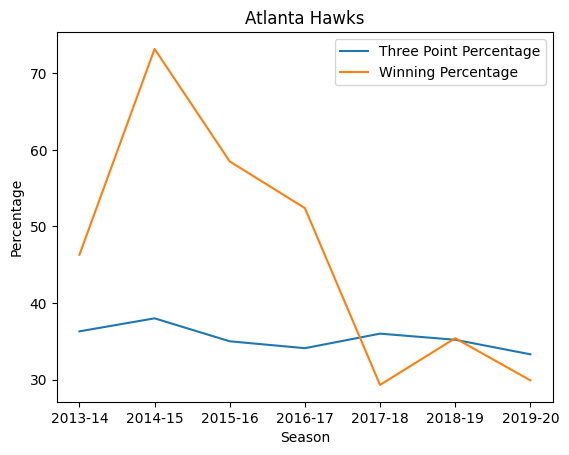

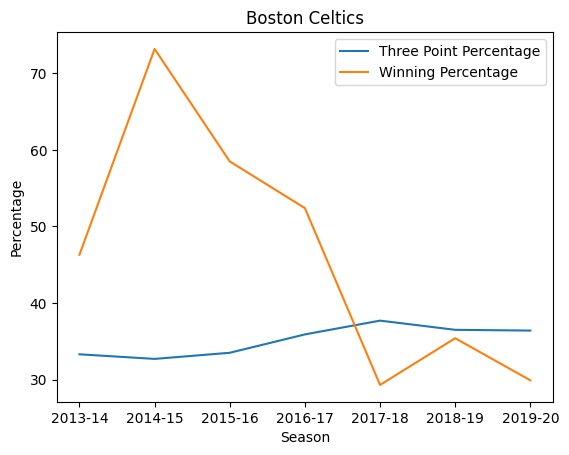

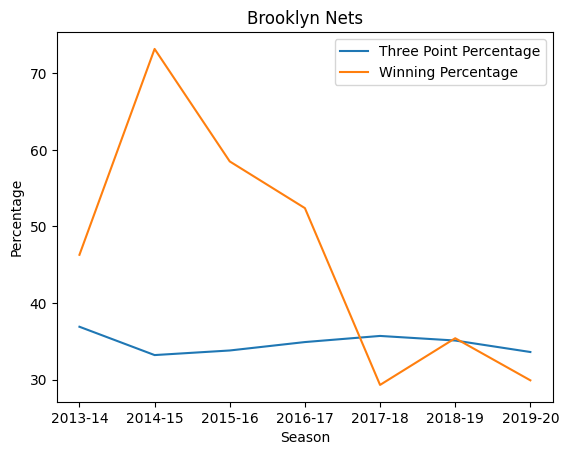

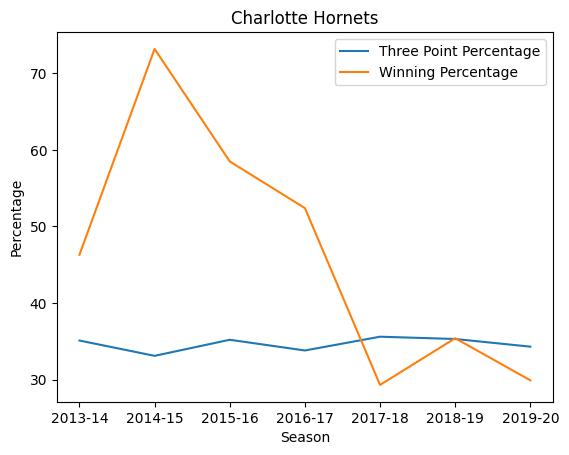

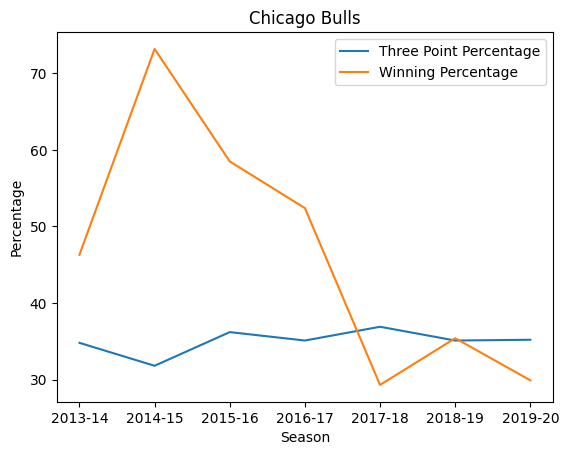

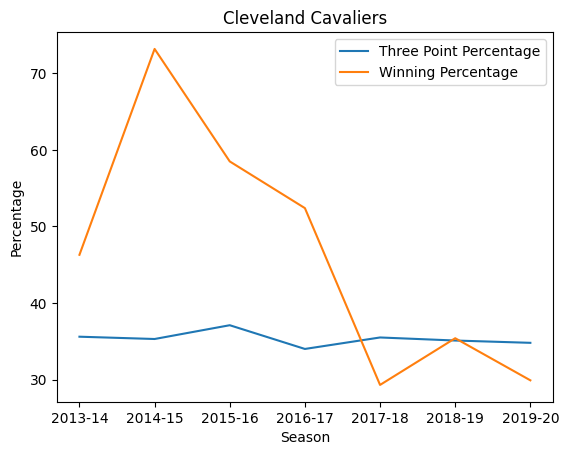

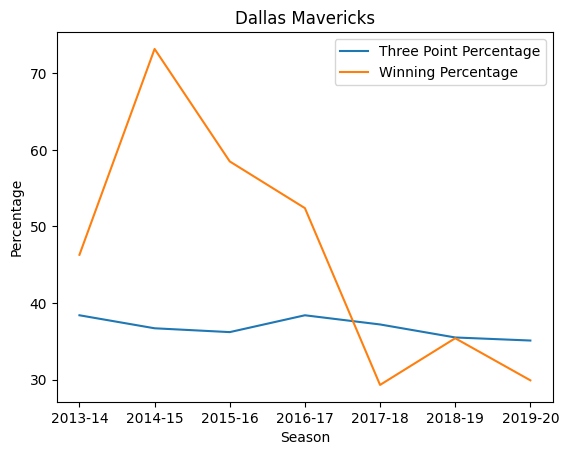

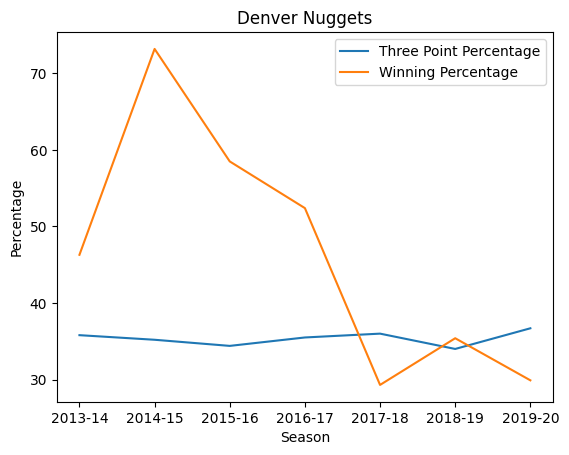

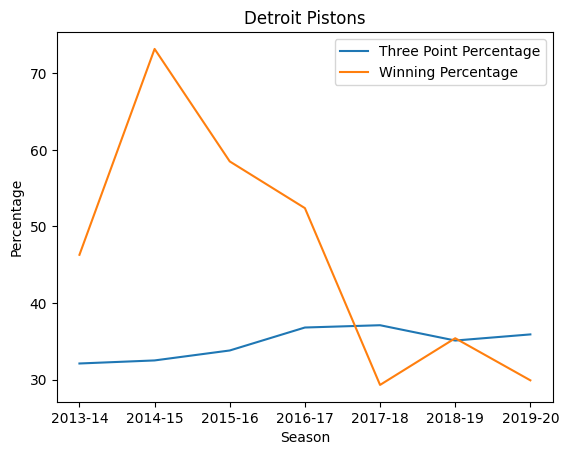

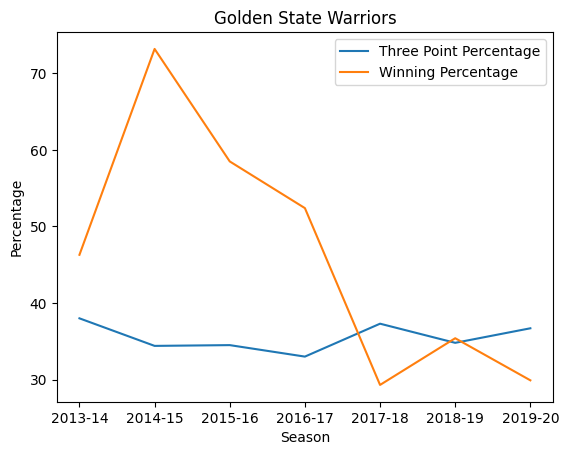

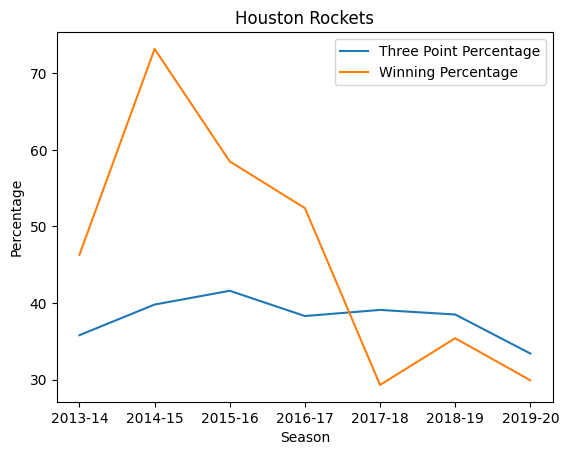

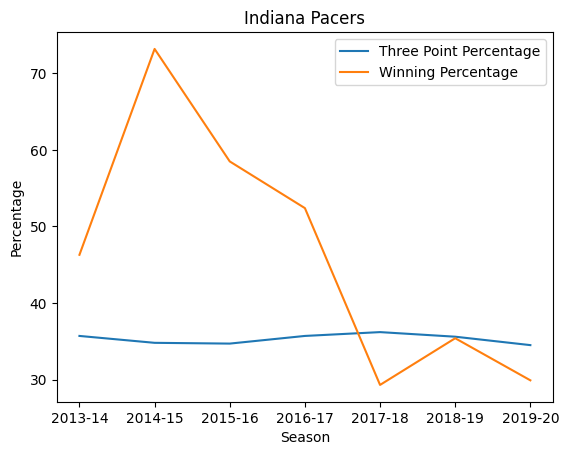

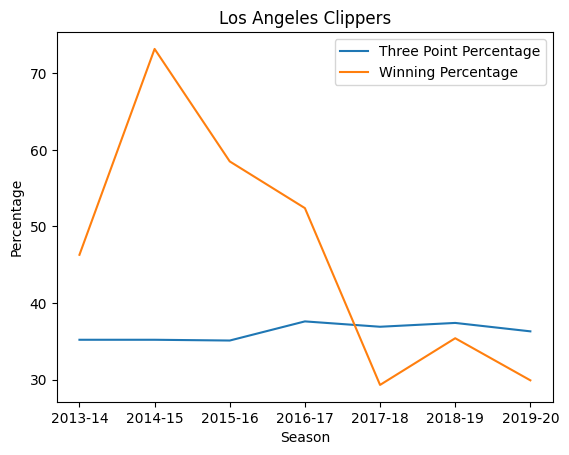

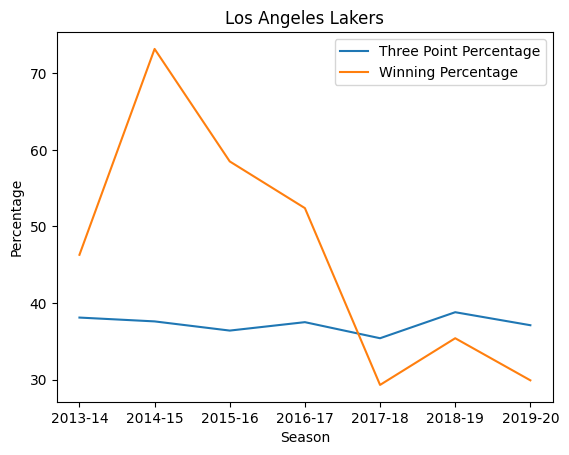

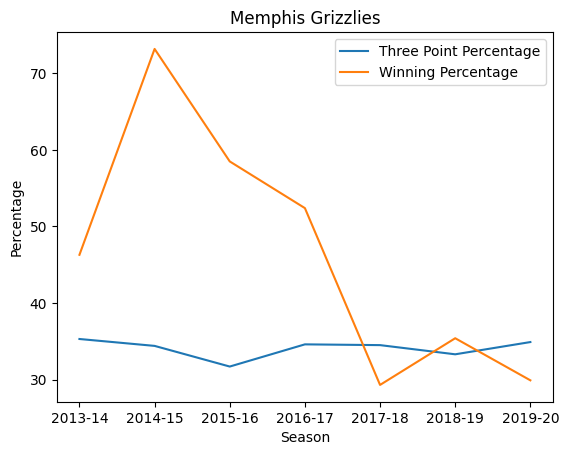

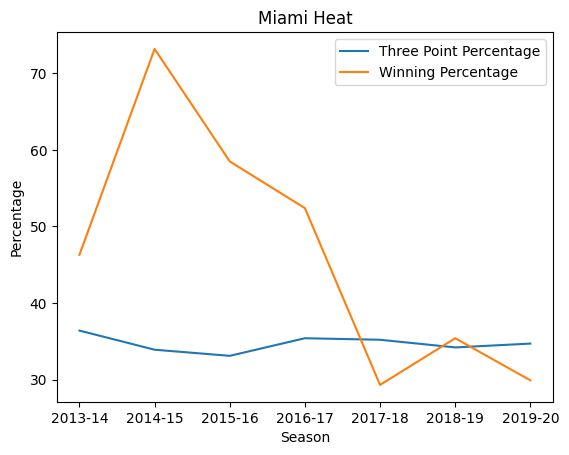

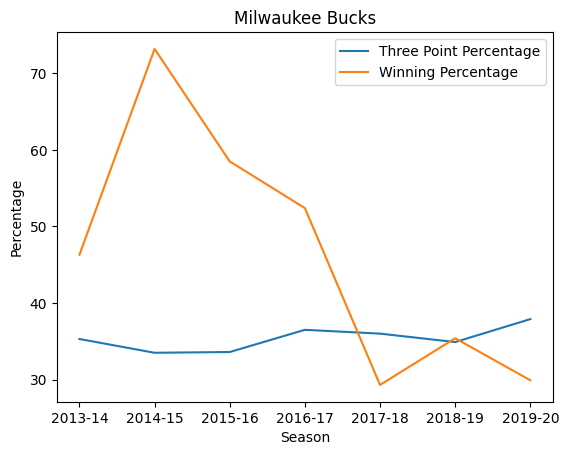

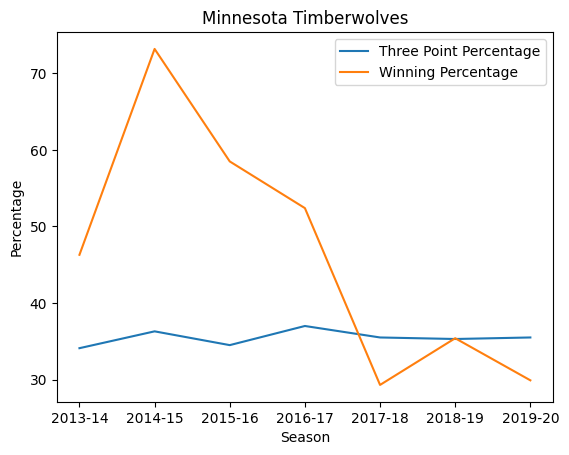

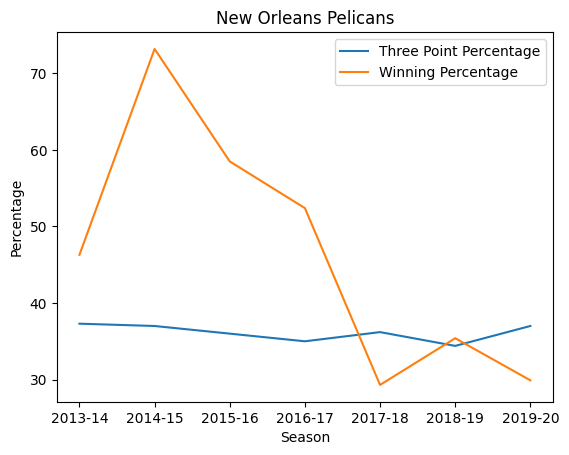

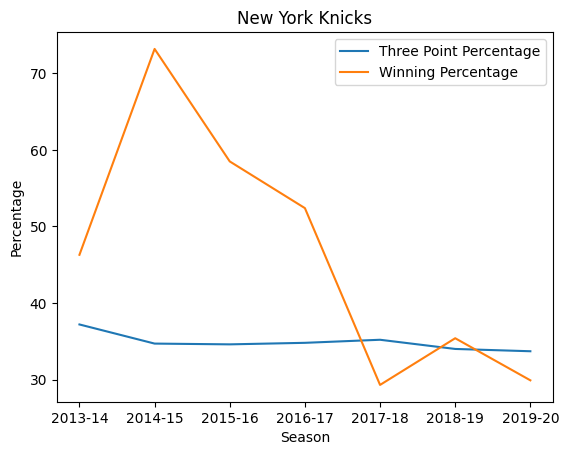

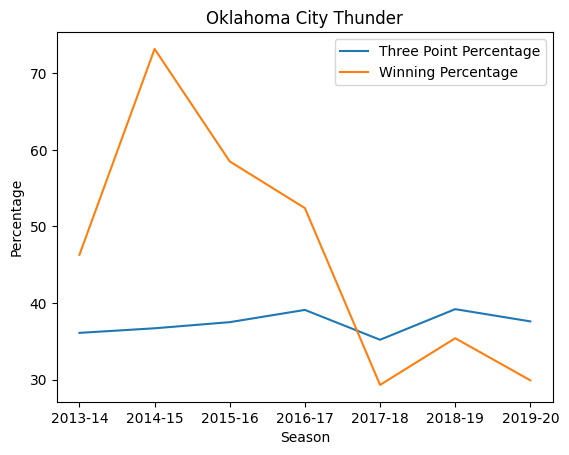

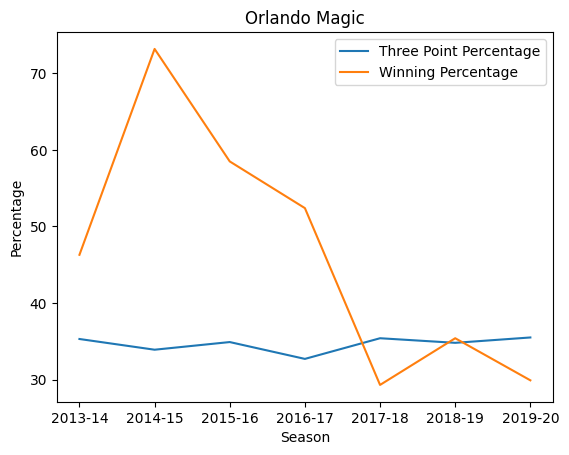

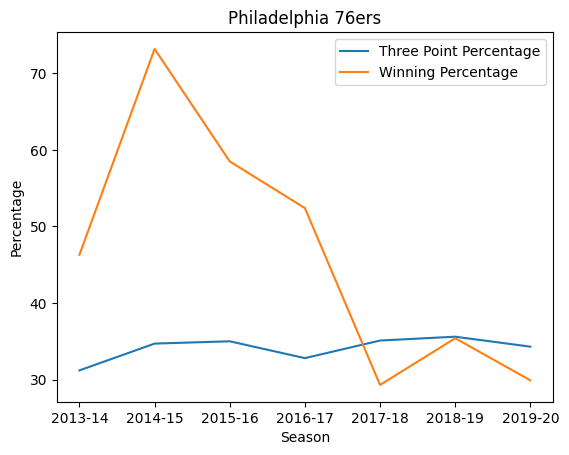

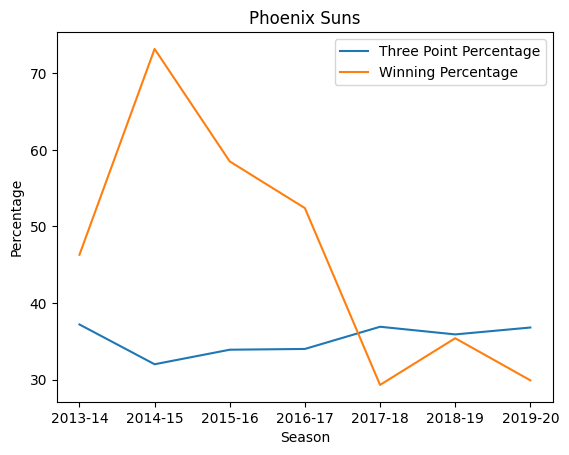

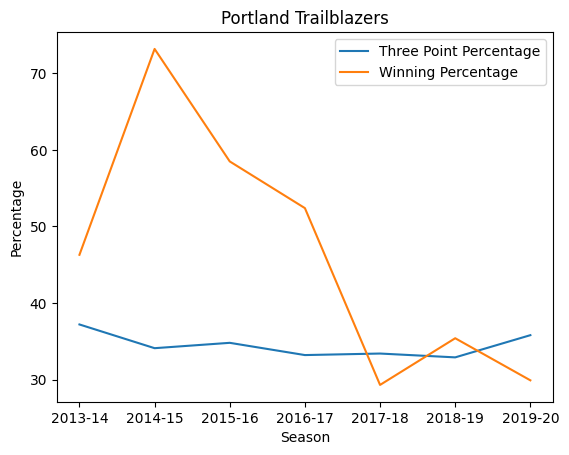

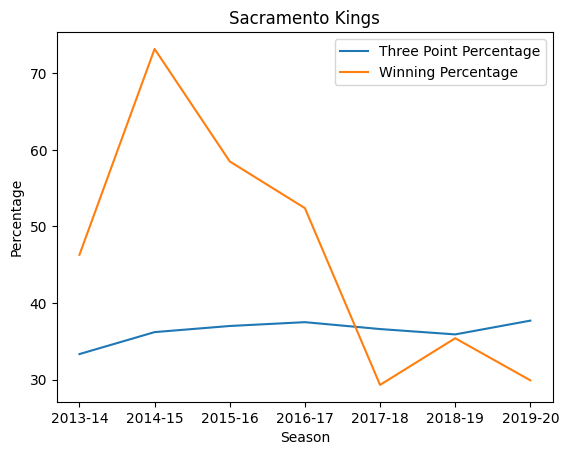

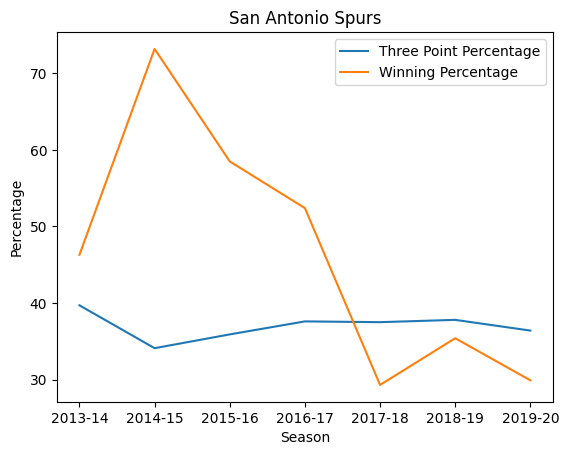

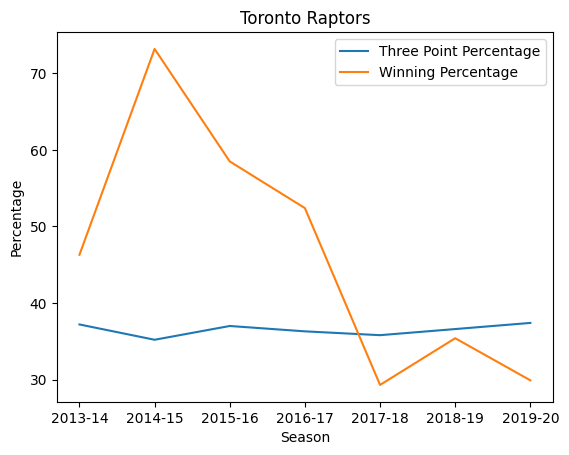

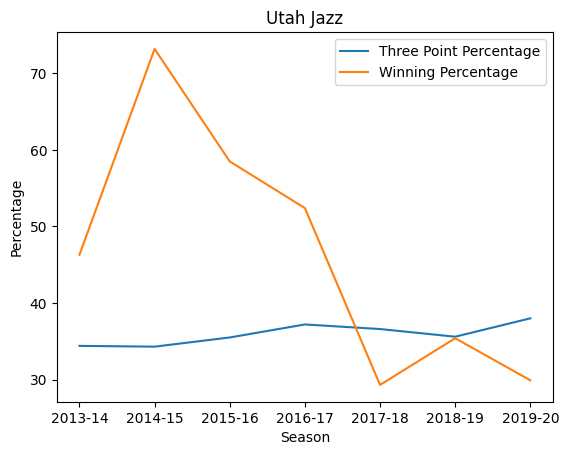

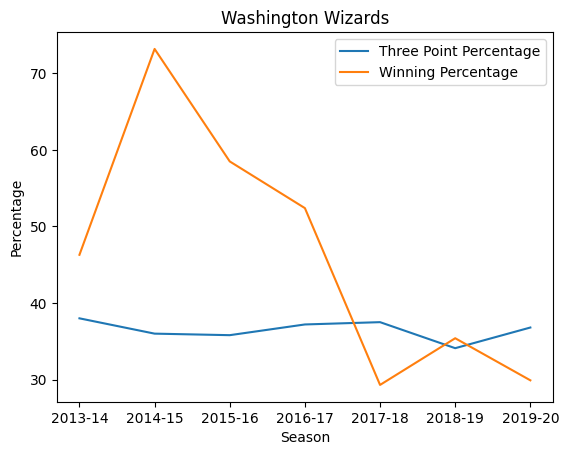

In [213]:
for team in  fixed_merge['Team'].unique():

    team_data = fixed_merge[fixed_merge['Team'] == team]


    x = team_data['Year']
    y1 = team_data['3P%']
    y2 = team_data['Win Pct']


    fig, ax = plt.subplots()


    ax.plot(x, y1, label='Three Point Percentage')
    ax.plot(x, y2, label='Winning Percentage')


    ax.set_title(team)
    ax.set_xlabel('Season')
    ax.set_ylabel('Percentage')


    ax.legend()


    plt.show()


In [205]:



#plt.plot(fixed_merge['Year'], fixed_merge['3PM'])

#fixed_merge.set_index(['Year'], inplace=True)
#plt.plot(fixed_merge['Year'],fixed_merge['3P%'])
#fixed_merge.groupby('Team')['3P%'].plot(legend=True)
#fixed_merge.plot.line(x='Team', y=['3P%'])
#fixed_merge.plot()
#fixed_merge.plot(x="Team"=='Los Angeles Lakers', y=["3PM"], kind="bar", figsize=(100, 30))


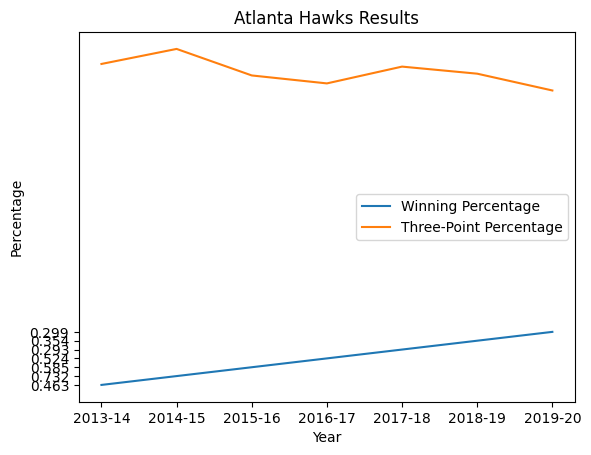

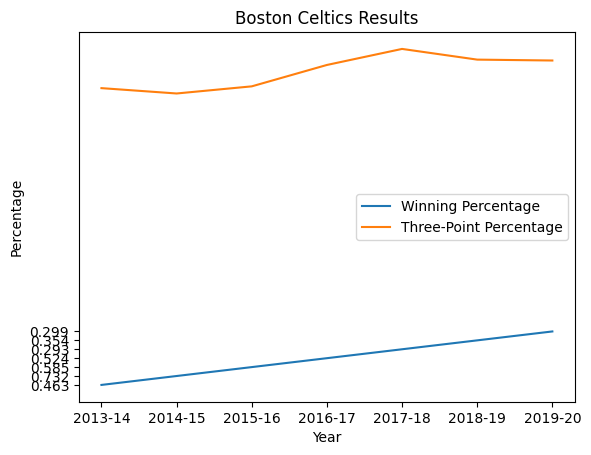

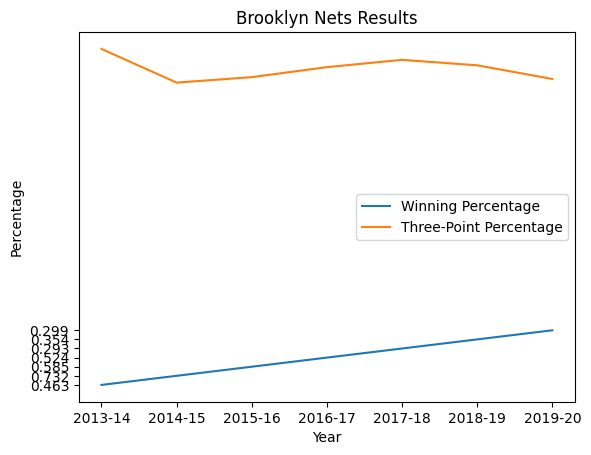

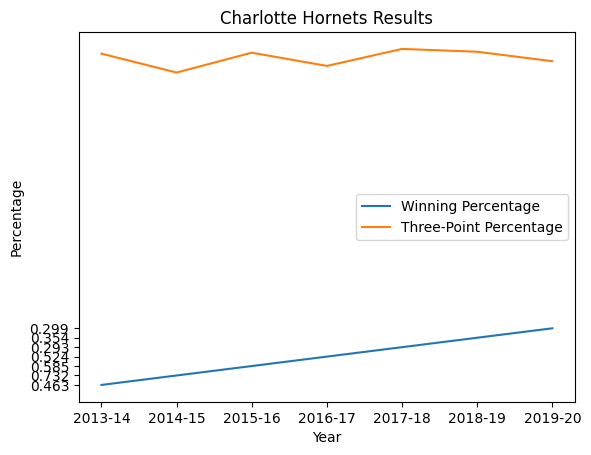

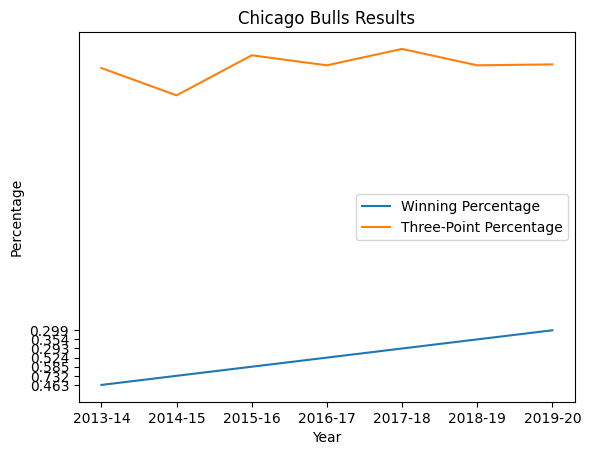

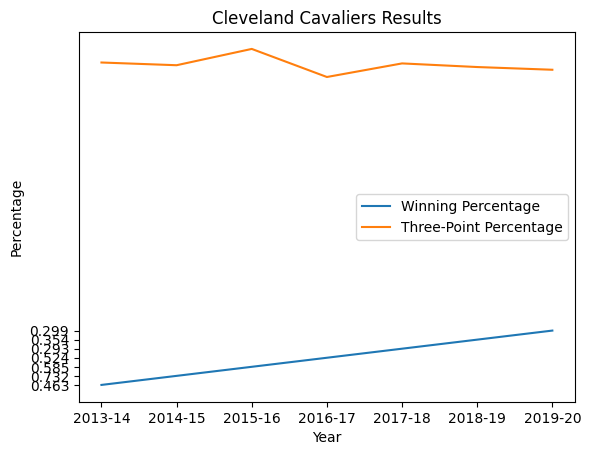

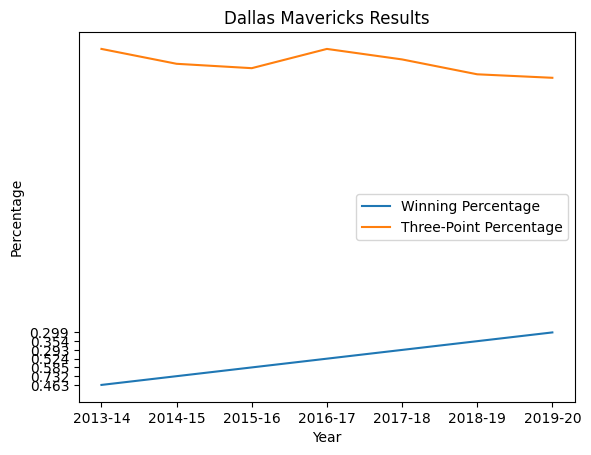

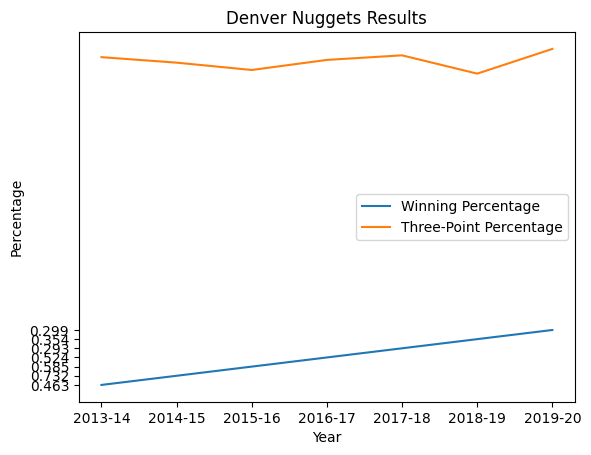

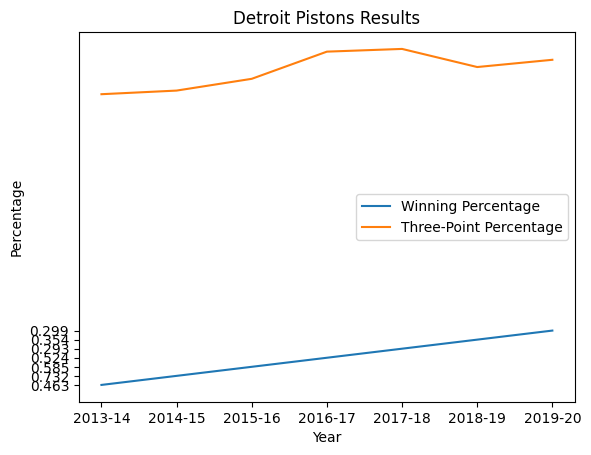

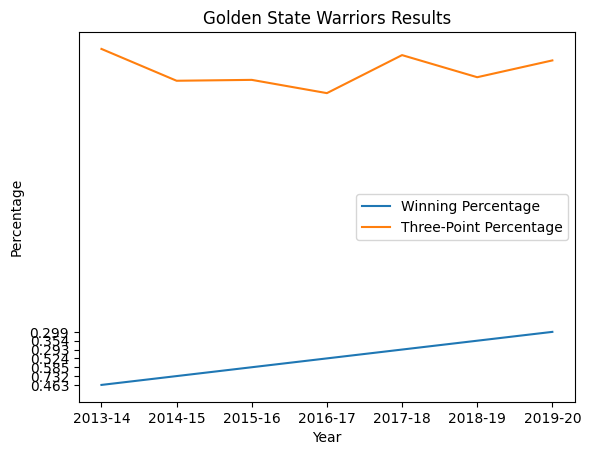

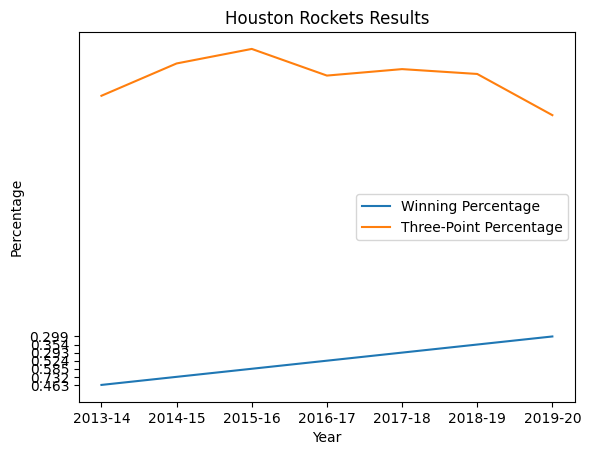

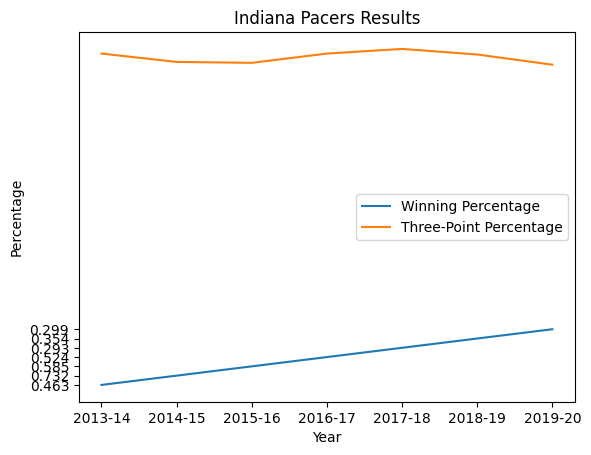

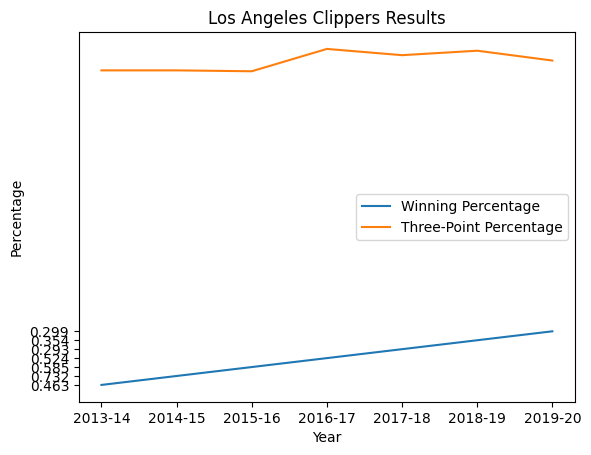

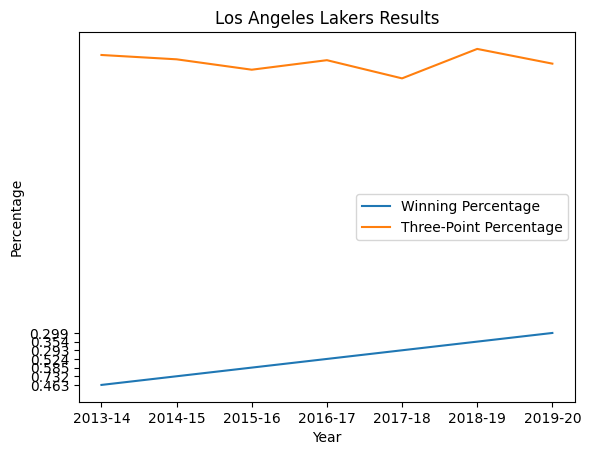

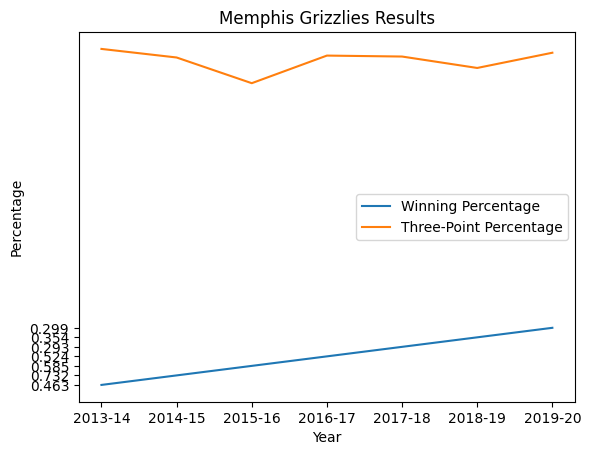

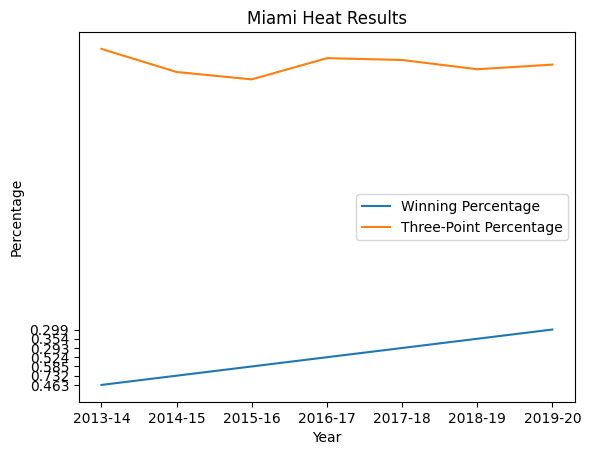

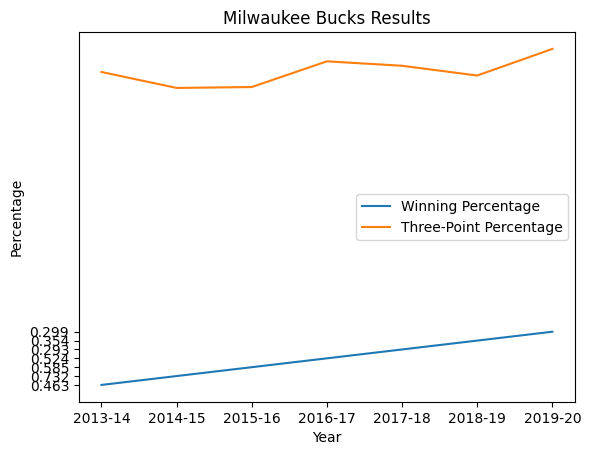

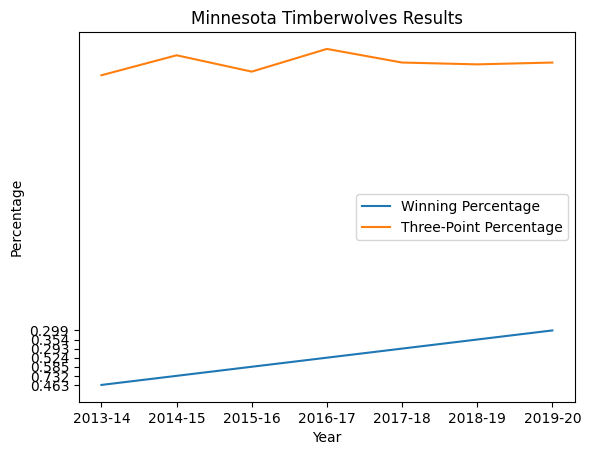

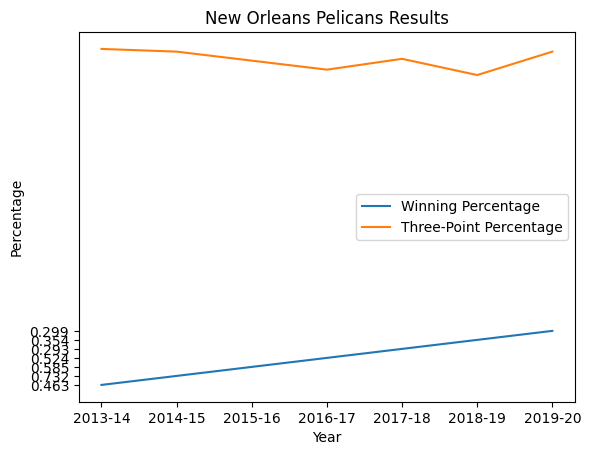

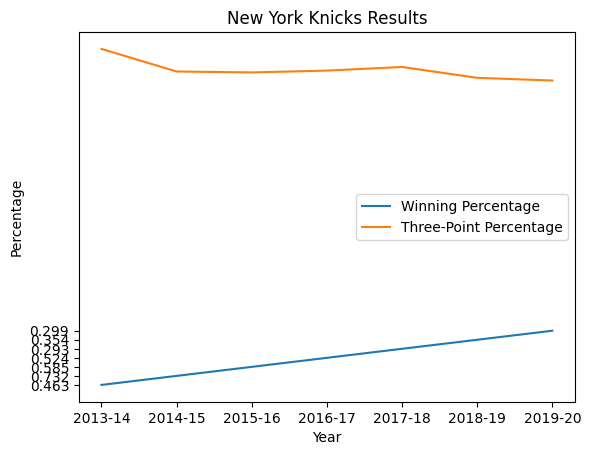

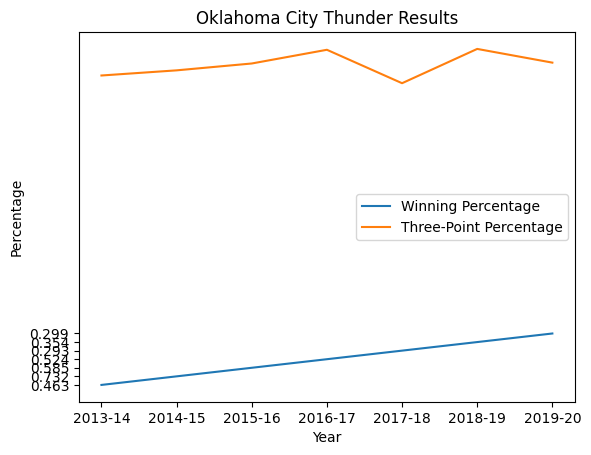

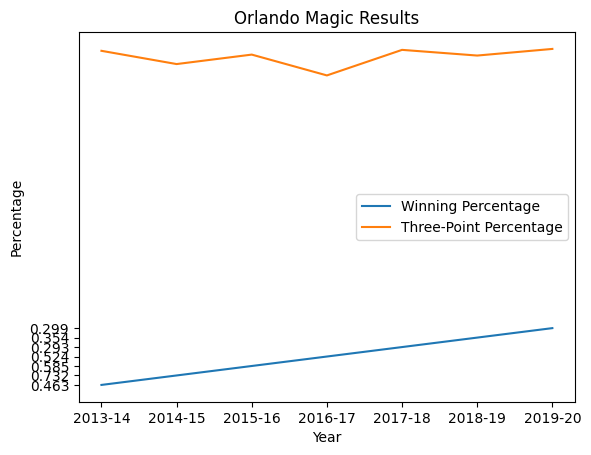

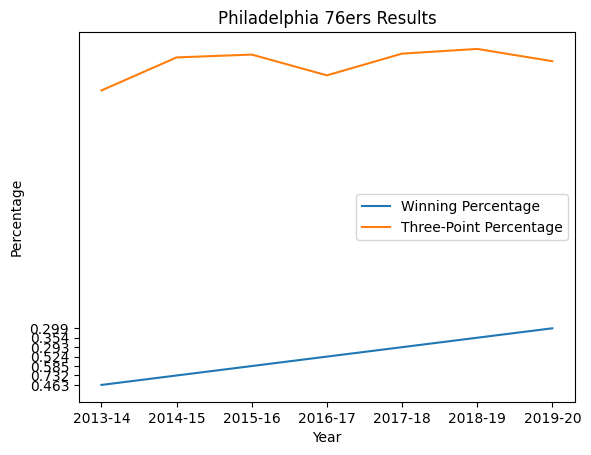

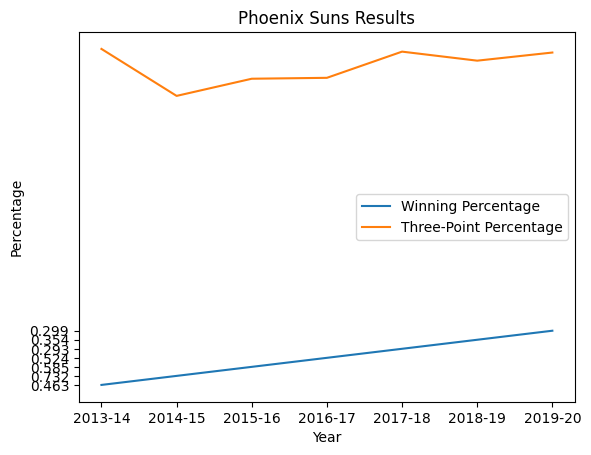

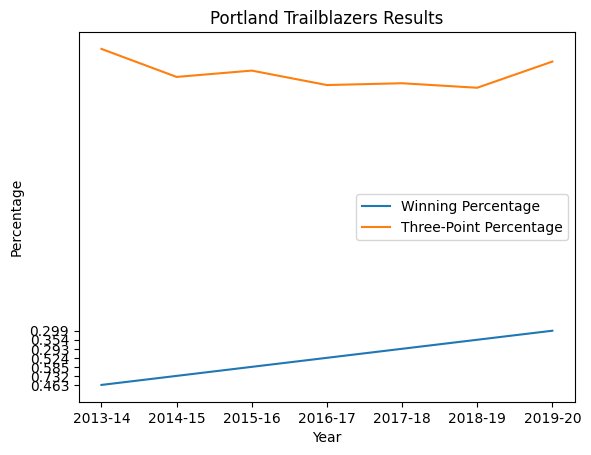

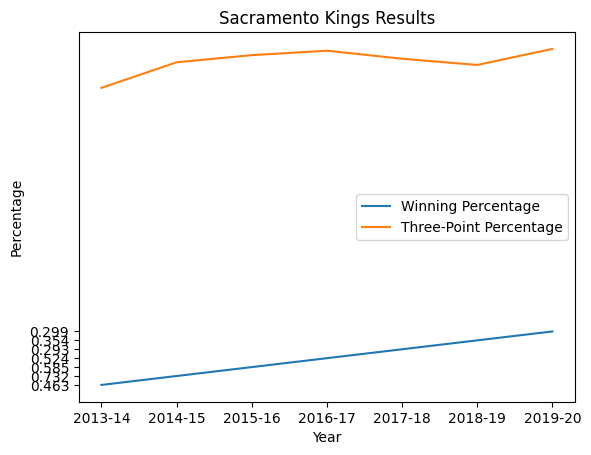

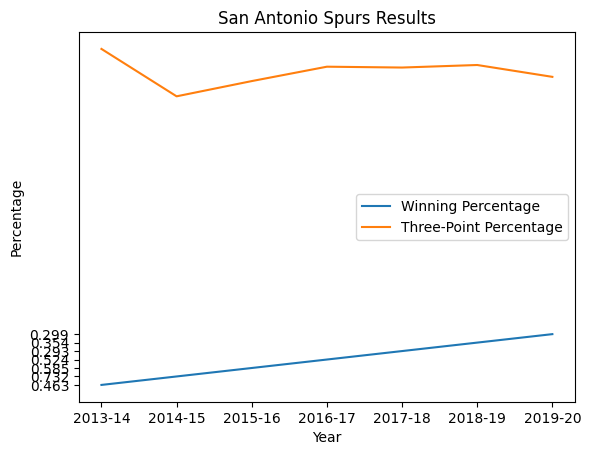

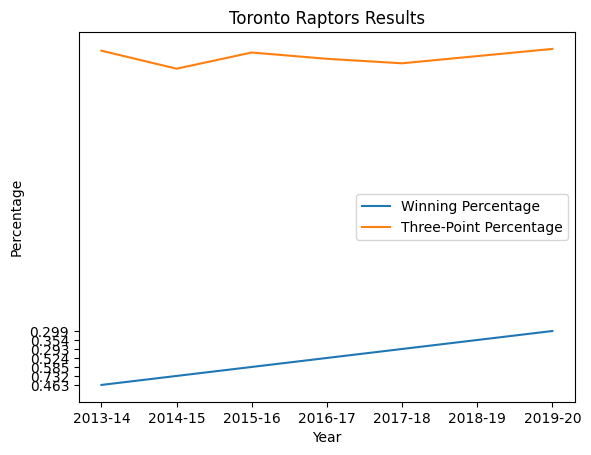

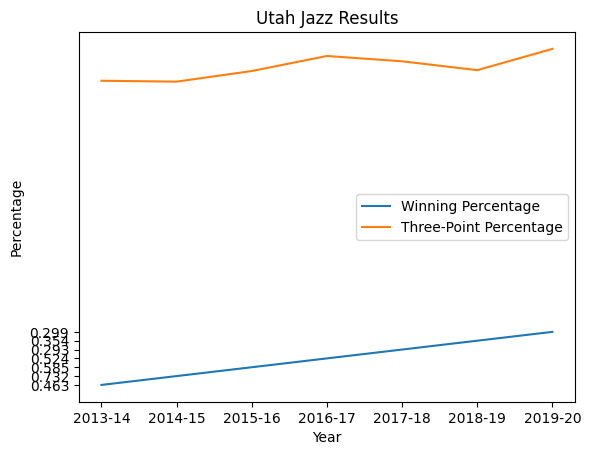

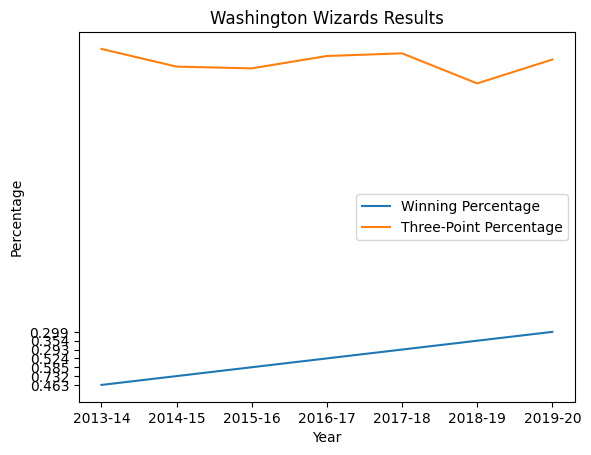

In [204]:
import pandas as pd
import matplotlib.pyplot as plt

group_df = fixed_merge.groupby('Team')


for team, group in group_df:

    fig, ax = plt.subplots()


    ax.plot(group['Year'], group['Win Pct'], label='Winning Percentage')
    ax.plot(group['Year'], group['3P%'], label='Three-Point Percentage')


    ax.set_title(f'{team} Results')
    ax.set_xlabel('Year')
    ax.set_ylabel('Percentage')


    ax.legend()


    plt.show()

TypeError: 'Text' object is not callable

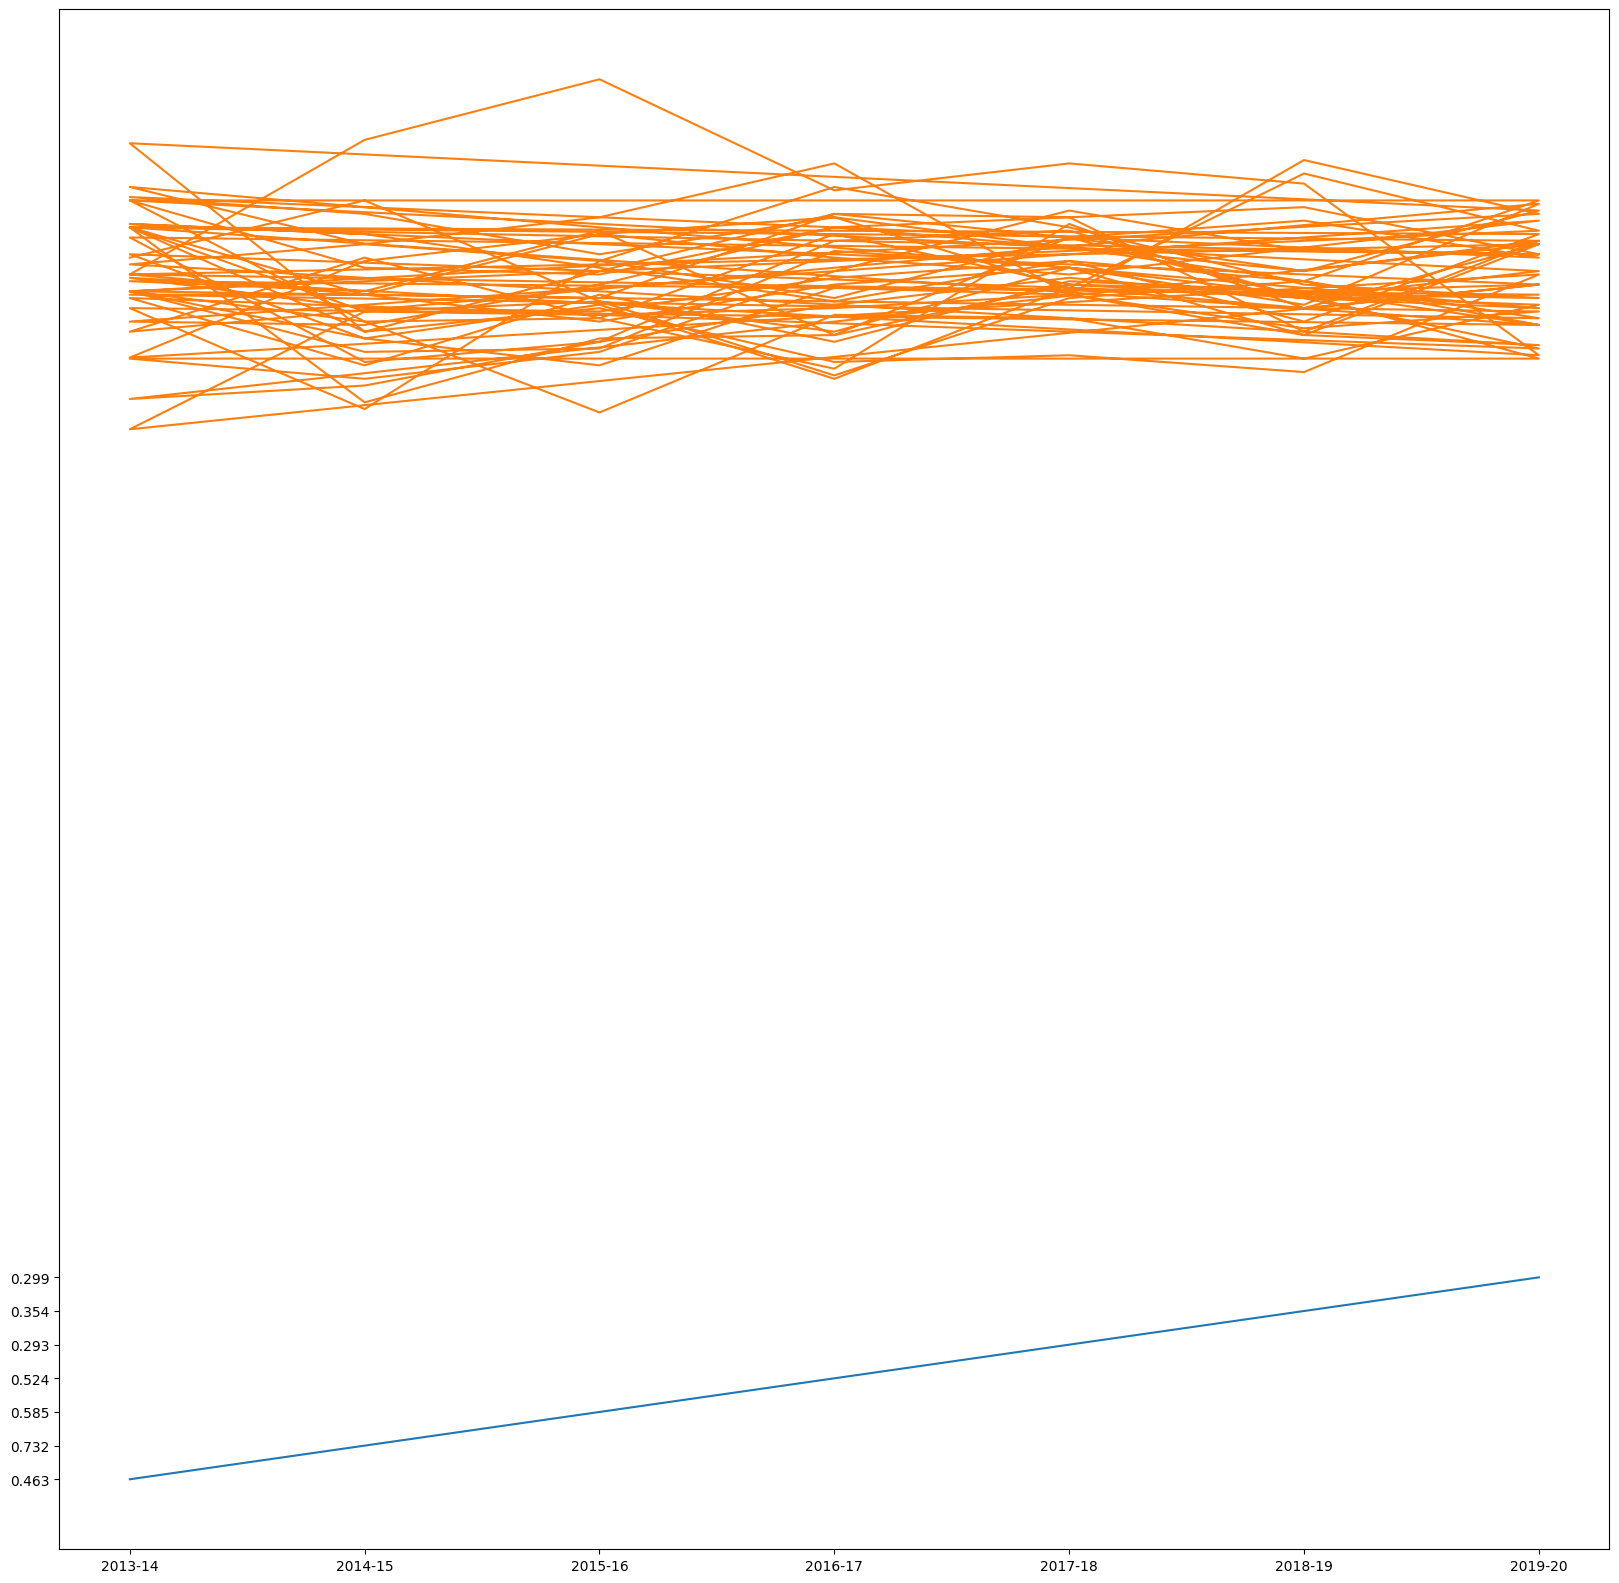

In [146]:
ig, Axes= plt.subplots(figsize=(20,20))
Axes.plot(fixed_merge['Year'], fixed_merge['Win Pct'], label='Winning Percentage')
Axes.plot(fixed_merge['Year'], fixed_merge['3P%'], label='Three-Point Percentage')


Axes.title('Team Performance')
Axes.xlabel('Year')
Axes.ylabel('Percentage')

Axes.set_xlim(2013-14,2019-20)
plt.legend()


plt.show()

Text(0.5, 1.0, 'NBA Pct')

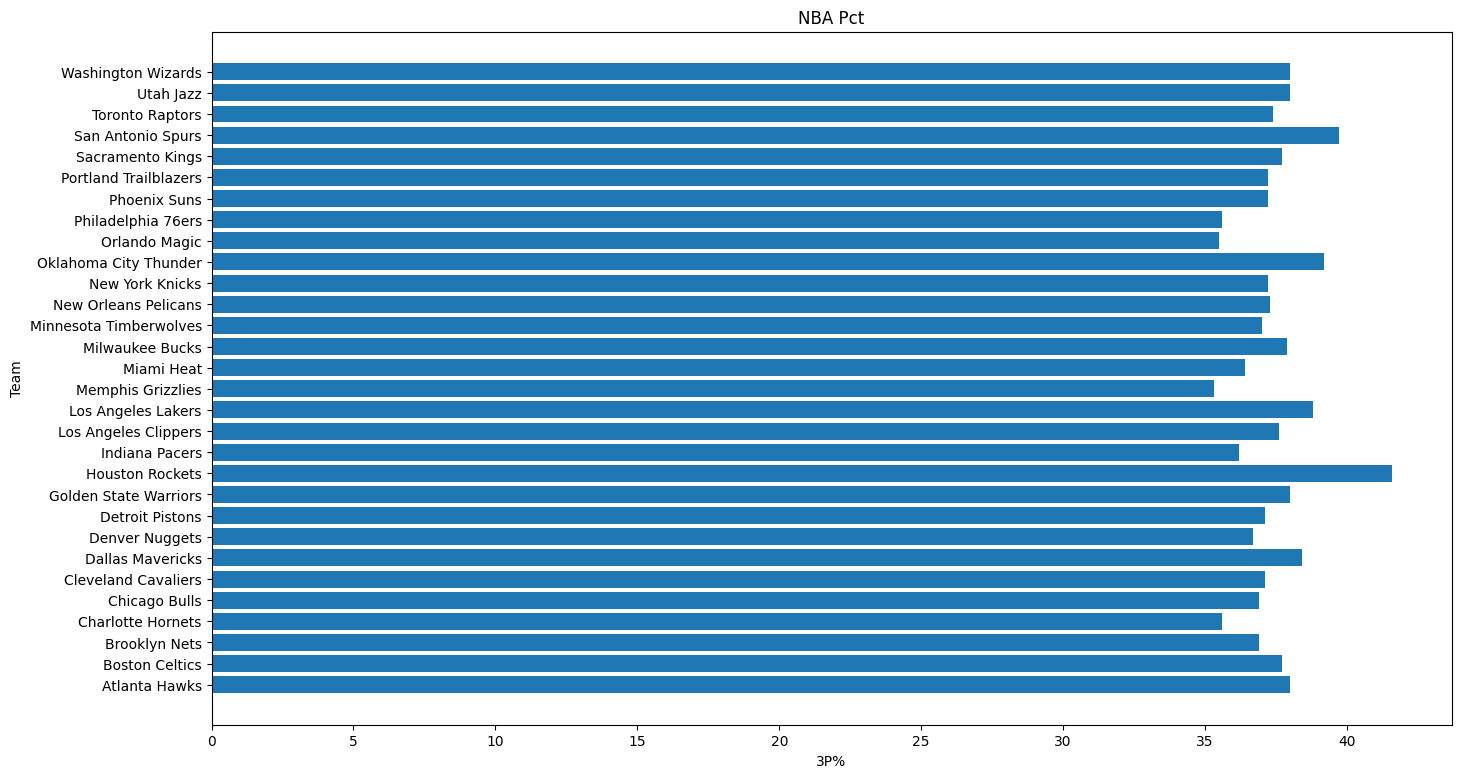

In [92]:
import matplotlib.pyplot as plt
plt.plot(fixed_merge['Year'],fixed_merge['3P%'])
plt.plot(fixed_merge['Year'],fixed_merge['Team'])
plt.xlabel('Year')
plt.ylabel('3P%')

plt.title("NBA Pct")

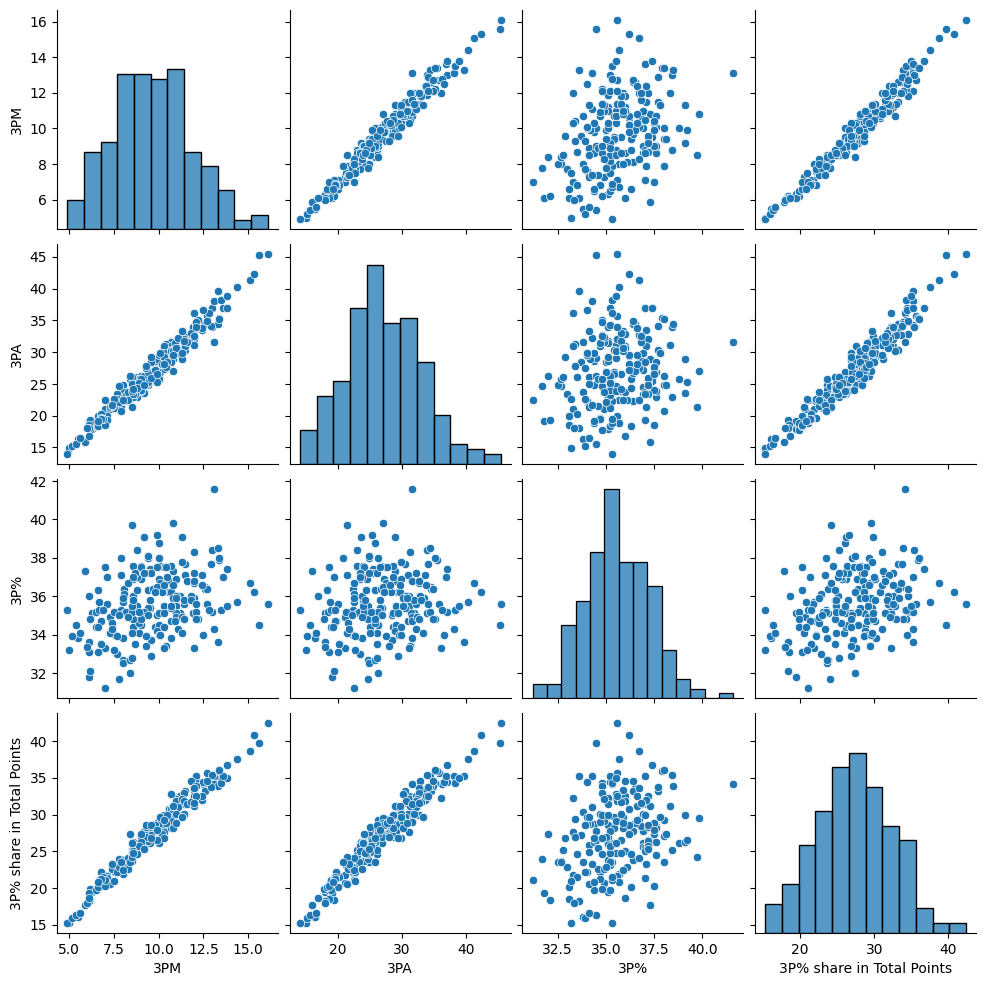

In [96]:
import seaborn as sns
sns.pairplot(fixed_merge)